<a href="https://colab.research.google.com/github/KosTeS1/git-2-fork/blob/main/Homework_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Домашнее задание 11 по теме 11**

---

1.   Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
2.   Оставьте два признака - sepal_length и sepal_width и целевую переменную
3.   Разделите данные на выборку для обучения и тестирования
4.   Постройте модель LDA
5.   Визуализируйте предсказания для тестовой выборки и центры классов (разделяющую плоскость можно не строить, но обратите внимание, что класса 3).
6.   Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
7.   Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию


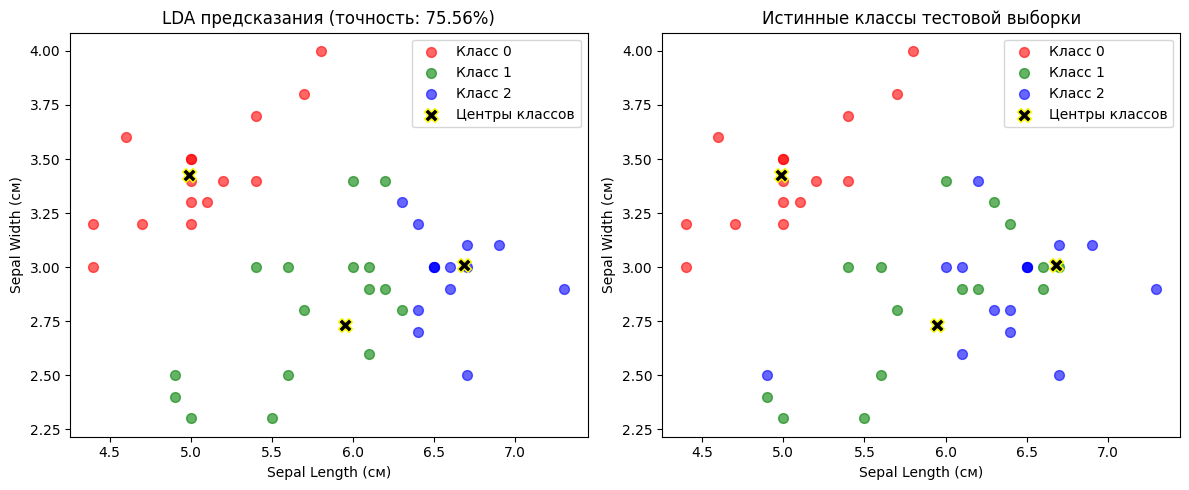

Центры классов:
[[4.98857143 3.42571429]
 [5.94857143 2.73142857]
 [6.68285714 3.00857143]]


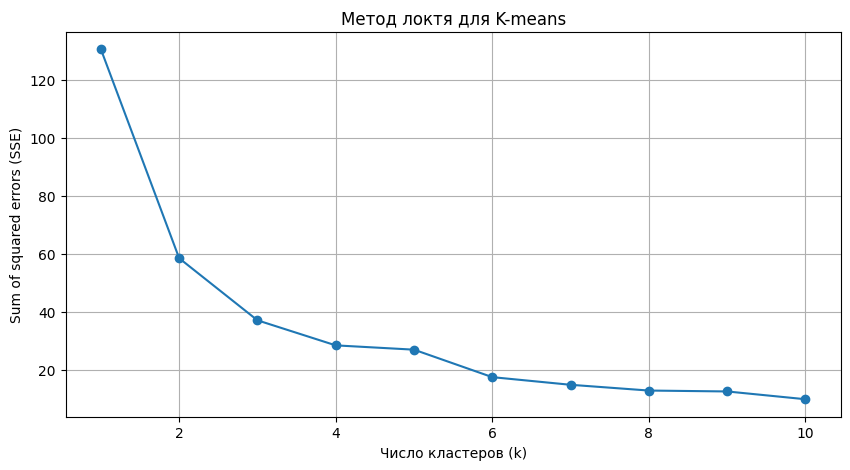

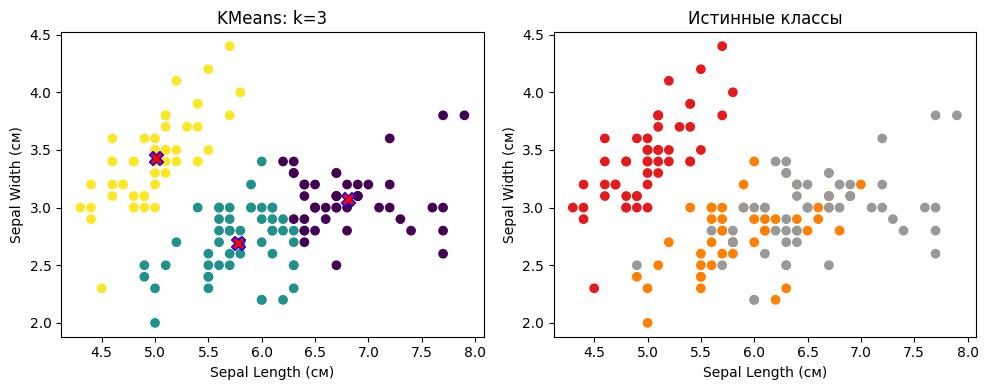

Оптимальное число кластеров: 3
Точность LDA: 75.56%


In [11]:
# Импортируем библиотеки
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# ЧАСТЬ 1: LDA
# 1. Загрузка и выбор признаков
iris = load_iris()
X = iris.data[:, :2]  # Sepal length и sepal width
y = iris.target

# 2. Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Построение LDA модели
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# 4. Визуализация
plt.figure(figsize=(12, 5))

# 5. Вычисляем центры классов в исходном пространстве
class_means = np.array([X_train[y_train == i].mean(axis=0) for i in range(3)])

# 6. График 1: Предсказания на тестовой выборке
plt.subplot(1, 2, 1)
colors = ['red', 'green', 'blue']
for i in range(3):
    plt.scatter(X_test[y_pred == i, 0], X_test[y_pred == i, 1],
                c=colors[i], label=f'Класс {i}', alpha=0.6, s=50)

plt.scatter(class_means[:, 0], class_means[:, 1],
            c='black', s=100, marker='X', edgecolor='yellow',
            label='Центры классов')

plt.xlabel('Sepal Length (см)')
plt.ylabel('Sepal Width (см)')
plt.title(f'LDA предсказания (точность: {accuracy:.2%})')
plt.legend()

# 7. График 2: Истинные классы тестовой выборки
plt.subplot(1, 2, 2)
for i in range(3):
    plt.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1],
                c=colors[i], label=f'Класс {i}', alpha=0.6, s=50)

plt.scatter(class_means[:, 0], class_means[:, 1],
            c='black', s=100, marker='X', edgecolor='yellow',
            label='Центры классов')

plt.xlabel('Sepal Length (см)')
plt.ylabel('Sepal Width (см)')
plt.title('Истинные классы тестовой выборки')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Центры классов:\n{class_means}")

# ЧАСТЬ 2: KMeans
# 1. Метод локтя для нахождения оптимального числа кластеров
sse_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(X)
    sse_values.append(kmeans.inertia_)  # Сумма квадратичных расстояний до ближайшего центра

# 2. Определение оптимальной точки локтя визуально
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), sse_values, marker='o')
plt.title("Метод локтя для K-means")
plt.xlabel("Число кластеров (k)")
plt.ylabel("Sum of squared errors (SSE)")
plt.grid(True)
plt.show()

# 3. Выбор оптимального числа кластеров = 3
optimal_k = 3

# 4. Обучение KMeans с оптимальным k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init="auto")
kmeans.fit(X)
y_kmeans = kmeans.labels_

# 5. Визуализация KMeans
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=100, marker='X', edgecolor='blue',
            label='Центры кластеров')
plt.xlabel('Sepal Length (см)')
plt.ylabel('Sepal Width (см)')
plt.title(f'KMeans: k={optimal_k}')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Set1')
plt.xlabel('Sepal Length (см)')
plt.ylabel('Sepal Width (см)')
plt.title('Истинные классы')

plt.tight_layout()
plt.show()

print(f"Оптимальное число кластеров: {optimal_k}")
print(f"Точность LDA: {accuracy:.2%}")